In [2]:
import ee
import glob
import geemap
import numpy as np
import matplotlib.pyplot as plt
import os
#from paths import *
import requests
import pandas as pd
import xarray as xr
from os import listdir
from datetime import datetime, timedelta, date
import contextlib
from xgrads import open_CtlDataset
from collections import OrderedDict


# Initialize the Earth Engine module
ee.Initialize()

In [3]:
#########################################################################
############################ USER INPUTS ################################
#########################################################################
# DOMAIN
# choose the modeling domain
domain = 'BEAU'
print(domain)
#path to CSO domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# PATHS
# path to temporary folder to store tif files from gee
TIFpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/GEE_modis/'
# path to where you want your output met .dat fime
OUTpath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/mm_'+domain+'_2010-2014.dat'
#########################################################################

BEAU


# download modis data

In [7]:
stdt = domains[domain]['st']
ed_dt = domains[domain]['ed']
# add one day because GEE does not count the last date
eddt = (datetime.strptime(ed_dt,'%Y-%m-%d') + timedelta(days = 1)).strftime('%Y-%m-%d')

In [8]:
'''
// These are the min and max corners of your domain in Lat, Long
// Input the minimum lat, lower left corner
'''
minLat = domains[domain]['Bbox']['latmin']
#// Input the minimum long, lower left corner
minLong = domains[domain]['Bbox']['lonmin']
#// Input the max lat, upper right corner
maxLat = domains[domain]['Bbox']['latmax']
#// Input the max Long, upper right corner
maxLong = domains[domain]['Bbox']['lonmax']

In [9]:
# This resolution for the NLCD and DEM outputs for the SnowModel domain in meters
sm_resolution = int(domains[domain]['cellsize'])

'''// Resolution for the PRISM output. This shoud change by Latitude of the domain
// because the PRISM product spatial resolution is 2.5 minutes, which equals 150 arc seconds.
// You can use this arc-second calculator to estimate the correct value for the PRISM resolution by latitude
// https://opendem.info/arc2meters.html
// This is one arc-second in meters for 43 degrees N Latitude'''
one_arcsecond = 22.57
PRISM_resolution = one_arcsecond * 150

'''// Define the final output projection using EPSG codes'''
epsg_code = domains[domain]['mod_proj']

#// Name the DEM output
dem_name = 'DEM'
#// Name the Land Cover output
lc_name = 'NLCD2016'

my_domain = ee.Geometry.Rectangle(**{'coords':[minLong,minLat,maxLong,maxLat],'proj': 'EPSG:4326','geodesic':True,});

# This resolution for the NLCD and DEM outputs for the SnowModel domain in meters
sm_resolution = int(domains[domain]['cellsize'])

In [10]:
# download modis data
dataset = ee.ImageCollection('MODIS/006/MOD16A2').filter(ee.Filter.date(stdt, eddt)).filterBounds(my_domain);
et = dataset.select('ET')

geemap.ee_export_image_collection(et, out_dir=TIFpath,region=my_domain,scale=sm_resolution,crs=epsg_code)

Total number of images: 862

Exporting 1/862: 2001_01_01.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_01.tif


Exporting 2/862: 2001_01_09.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_09.tif


Exporting 3/862: 2001_01_17.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_17.tif


Exporting 4/862: 2001_01_25.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_25.tif


Exporting 5/862: 2001_02_02.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_02.tif


Exporting 6/862: 2001_02_10.tif
Generating URL ...
Please wait ...
Data downloaded to /nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_10.tif


Exporting 7/862: 2001_02_18.t

# Calculate ET for each water year

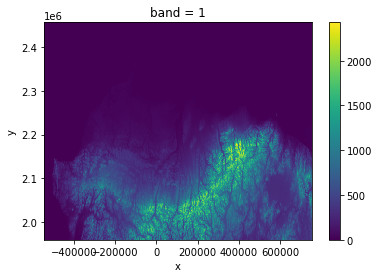

In [12]:
# open dem data to use as geospatial reference
dempath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'+domain+'_dem.tif'
dem = xr.open_rasterio(dempath)
dem.plot()

In [16]:
list_of_files = sorted( filter( os.path.isfile, glob.glob(TIFpath + '*') ) )
list_of_files

['/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_01.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_09.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_17.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_01_25.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_02.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_10.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_18.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_02_26.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_03_06.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_03_14.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_03_22.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_03_30.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_modis/2001_04_07.tif',
 '/nfs/attic/dfh/2020_NPRB/data/modis_ET/BEAU/GEE_m

In [19]:
listofdates=[pd.to_datetime(file[-14:-4],format="%Y_%m_%d") for file in list_of_files]
dates= np.asarray(listofdates)
dates

array([Timestamp('2001-01-01 00:00:00'), Timestamp('2001-01-09 00:00:00'),
       Timestamp('2001-01-17 00:00:00'), Timestamp('2001-01-25 00:00:00'),
       Timestamp('2001-02-02 00:00:00'), Timestamp('2001-02-10 00:00:00'),
       Timestamp('2001-02-18 00:00:00'), Timestamp('2001-02-26 00:00:00'),
       Timestamp('2001-03-06 00:00:00'), Timestamp('2001-03-14 00:00:00'),
       Timestamp('2001-03-22 00:00:00'), Timestamp('2001-03-30 00:00:00'),
       Timestamp('2001-04-07 00:00:00'), Timestamp('2001-04-15 00:00:00'),
       Timestamp('2001-04-23 00:00:00'), Timestamp('2001-05-01 00:00:00'),
       Timestamp('2001-05-09 00:00:00'), Timestamp('2001-05-17 00:00:00'),
       Timestamp('2001-05-25 00:00:00'), Timestamp('2001-06-02 00:00:00'),
       Timestamp('2001-06-10 00:00:00'), Timestamp('2001-06-18 00:00:00'),
       Timestamp('2001-07-04 00:00:00'), Timestamp('2001-07-12 00:00:00'),
       Timestamp('2001-07-20 00:00:00'), Timestamp('2001-07-28 00:00:00'),
       Timestamp('2001-08

In [35]:
# preprocessing function
def preprocess(ds):
    '''reduce dimensions'''
    return ds.isel(band=0)


#figure out files to open
start_years_list = list(range(2001,2019))


#water year ET
modisET=np.empty([len(start_years_list),len(dem.y),len(dem.x)])

for i in range(len(start_years_list)):
    styr = start_years_list[i]
    # find the dates for this year
    indates=dates[(dates>pd.to_datetime(str(styr)+'-09-01'))&(dates<=pd.to_datetime(str(styr+1)+'-11-01'))]
    # files for this year
    infiles = np.array(list_of_files)[np.isin(listofdates,indates)]
    # sum et over all 8d timesteps
    # may want to change this proceedure to calculate average daily et, then sum then shape over the annual cycle... would fill gaps
    data = xr.open_mfdataset(infiles, concat_dim='band',preprocess=preprocess,combine='nested')
    # the valid range for et values is -32767 to 32700
    validdata=data.band_data.where(data.band_data<=32700)
    # multiply summed et by scale factor of 0.1 to convert units of kg/m^2/8day to mm/8day
    # multiply summed et by scale factor of 0.0001 to convert units of kg/m^2/8day to m/8day
    sumdata=validdata.sum(dim='band')*0.0001
    modisET[i,:,:]=np.squeeze(sumdata.values)

In [39]:
#Turn into xarray 

data = xr.DataArray(
    modisET,
    dims=('wy', 'y', 'x'), 
    coords={'wy': [year+1 for year in start_years_list], 
            'y': dem.y.values, 'x': dem.x.values})

d = OrderedDict()
d['wy'] = ('wy', [year+1 for year in start_years_list])
d['y'] = ('y', dem.y.values)
d['x'] = ('x',dem.x.values)
d['modisET'] = data

ds = xr.Dataset(d)
outpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/modis_annualET_m.nc'
ds.to_netcdf(outpath, format='NETCDF4', engine='netcdf4')

## ET climatology

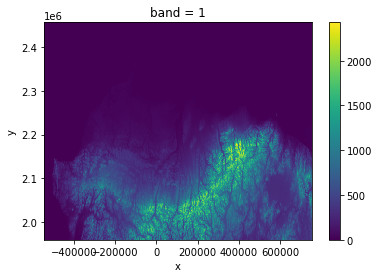

In [4]:
# open dem data
dempath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'+domain+'_dem.tif'
dem = xr.open_rasterio(dempath)
dem.plot()

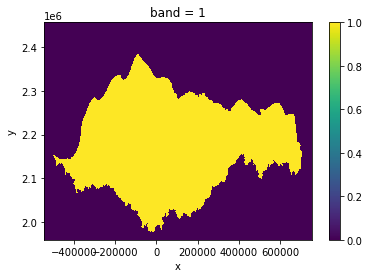

In [5]:
#open file with huc2 of interest
output_path = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'
file_name = domain+'_rasterized.tif'
mask = xr.open_rasterio(output_path+file_name)
mask.plot()

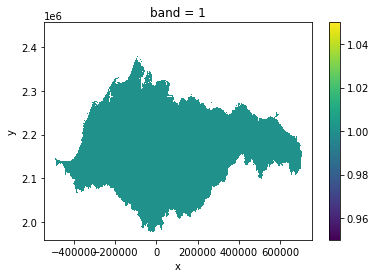

In [6]:
#create final domain mask
final_mask =mask.where((mask==1)&(dem>0))
final_mask.plot()

In [7]:
# number of pixels in watershed
numpix = int(final_mask.where(final_mask==1).count())
# watershed area
h2oshed_area = numpix*1000*1000 #[m^2]
h2oshed_area

221104000000

In [9]:
path = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/modis_annualET_m.nc'
modis = xr.open_dataset(path)
modis

<xarray.Dataset>
Dimensions:  (wy: 18, y: 496, x: 1298)
Coordinates:
  * wy       (wy) int64 2002 2003 2004 2005 2006 ... 2015 2016 2017 2018 2019
  * y        (y) float64 2.456e+06 2.454e+06 2.454e+06 ... 1.962e+06 1.96e+06
  * x        (x) float64 -5.425e+05 -5.415e+05 ... 7.535e+05 7.545e+05
Data variables:
    modisET  (wy, y, x) float64 ...

In [10]:
#specific ET
specET=[]

for yr in modis.wy:
    indata = modis.modisET.sel(wy=yr).where(final_mask==1)
    specET.append(int(indata.sum())/numpix)

In [15]:
print('mean specific ET =',np.mean(specET),' m/yr')

mean specific ET = 0.1943891662847448  m/yr


Text(0.5, 1.0, 'MODIS ET in BEAU domain')

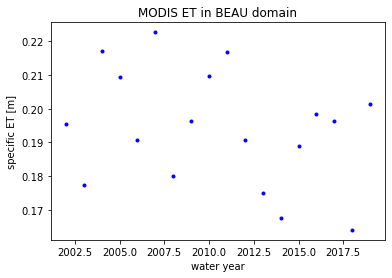

In [13]:
plt.plot(modis.wy.values,specET,'b.')
plt.ylabel('specific ET [m]')
plt.xlabel('water year')
plt.title('MODIS ET in '+domain+' domain')